# Investing the Use of XGboost for GDP Growth Projection
**By Irti Haq & Sanjana Kumar**

IMT 574B : 19 March 2025

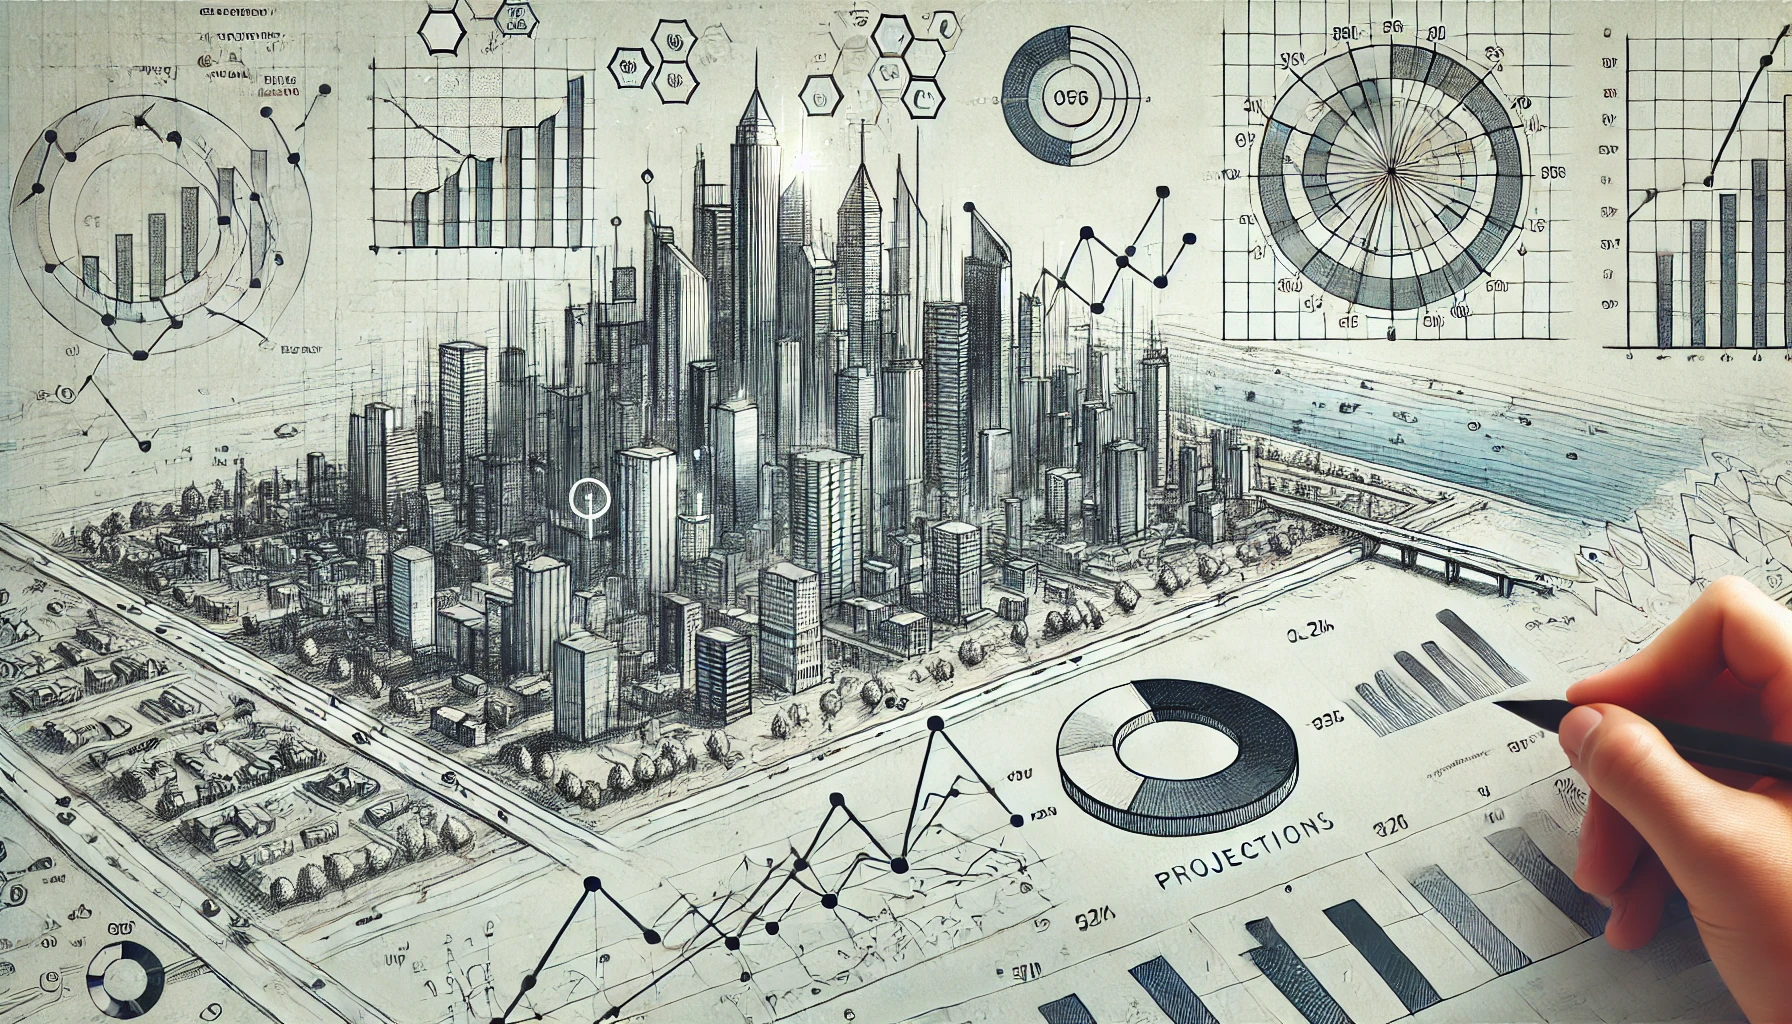


## Research Question:
**How Accurately Can a Machine Learning Model be Used to Predict and Forecast GDP Growth Rates For OECD Nations?**

For this project our goal is to explore how ML can be applied to Economic Data and be used to Forecast and Predict the GDP Growth Rate For OECD Nations. GDP Growth Rate Projections play a crucial role helping Economists and Government Planner plan Various Economic Policies: Both Monetary and Fiscal Policy and is key economic metric in diagnosing and measuring the Health of an Economy. However, it can be difficult to predict and forecast GDP growth rates we want to see ML models like XG-Boost can play a role in helping predict and Forecast GDP Growth Rates.


## Machine Learning Model Used: XGBoost
XGBoost (Extreme Gradient Boosting) is an open-source variant of an gradient-boosted decision tree (GBDT) that provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems 

**Why did we Select XGBoost to answer this research question:**

- Performance and Accuracy
XGBoost (Extreme Gradient Boosting) is known for its high predictive accuracy compared to other algorithms. It efficiently handles complex relationships in data, making it suitable for predicting GDP growth rates influenced by multiple economic indicators. At the same time its algorithm is able to cache data and utilize multiple CPU cores for faster processing

- Handling Non-Linear Relationships
Economic data often exhibits non-linear relationships. XGBoost can model these non-linearities effectively through its boosting mechanism.

- Reduce Overfitting
XGBoost uses advanced regularization techniques including built-in regularization techniques (L1 and L2) to suppress weights and reduce overfitting. This ensures that the model generalizes well to unseen data and enhance its performance in real-world scenarios. 

- Feature Importance and Selection
XGBoost provides insights into feature importance, helping to identify which economic indicators most significantly impact GDP growth rates. This ability to rank features allows for better understanding of the model.

## Our Dataset : World Bank

#### Dataset Overview
In order to answer this Question we are using Economic Data From the World Bank and we are accessing this using the World Bank's Python API (wbgapi), which provides economic, social, and environmental data for countries around the world. The World Bank mostly sources its Data from the statistical systems of member countries, and the quality of global data depends on how well these national systems perform. At the World Bank, the Development Data Group is responsible coordinating statistical and data work and maintains the dataset.

#### Reason for Selection
This dataset was selected due to its wide range of economic indicators, its global coverage, and its credibility as a source of development data. By focusing on OECD Nations, we can investigate how different factors—such as inflation, unemployment, Consumer and Government Spending can affect GDP growth predictions, providing insights that can inform policymakers and economists.

We decided to use Data from OECD (Organization for Economic Cooperation and Development) nations to train our model. The OECD is comprised of the 38 member states : Austria, Australia, Belgium, Canada, Chile, Colombia, Costa Rica, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, Korea, Latvia, Lithuania, Luxembourg, Mexico, the Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, the United Kingdom and the United States. 

These nations are all democracies with market-based economies and the majority of OECD members are generally regarded as developed countries, with high-income economies, and a very high Human Development Index. This is key and is the reason why our model is being trained to predict the GDP Rate for these Handful of Nations. Developed High Income Market Based Economies have district Economic Characteristic especially when it comes to Economic Growth compared to Developing Economics. 

Given their mature economic frameworks, these nations primarily experience what is referred to as "breakthrough growth" driven by innovation, rather than "catch-up growth" seen in developing economies. Focusing specifically on Developed Economies in essence allows us to allows us to simplify the complexity inherent in  economic Growth modeling. By concentrating on a relatively homogenous group of nations with similar economic structures and development levels, we can reduce the variability and complexity that would otherwise arise from including a wider range of economies and it would allow ou model to perform better

**For our model we will be using the Following Features. These where selected based on the Following Papers:**
> Qureshi, S., Chu, B. M., & Demers, F. S. (2020). Forecasting canadian gdp growth using xgboost (No. 20-14). Carleton University, Department of Economics.

> Adewale, M. D., Ebem, D. U., Awodele, O., Sambo-Magaji, A., Aggrey, E. M., Okechalu, E. A., ... & Oluyide, O. P. (2024). Predicting gross domestic product using the ensemble machine > learning method. Systems and Soft Computing, 6, 200132.

#### Features
    "FP.CPI.TOTL.ZG": "Inflation (CPI annual %)",
    "SL.UEM.TOTL.ZS": "Unemployment rate (%)",
    "NE.CON.PRVT.KD": "Household consumption (constant US$)",
    "NE.EXP.GNFS.KD": "Total exports (constant US$)",
    "NE.IMP.GNFS.KD": "Total imports (constant US$)",
    "BX.KLT.DINV.CD.WD": "FDI net inflows (current US$)",
    "FM.LBL.MQMY.CN": "Money supply M2 (local currency)",
    "CM.MKT.LCAP.CD": "Stock market capitalization (current US$)",
    "SP.POP.TOTL": "Total population",
    "SL.TLF.TOTL.IN": "Total labor force",
    "SP.URB.TOTL": "Urban population",
    "NV.AGR.TOTL.KD": "Agriculture value-added (constant US$)",
    "NV.IND.TOTL.KD": "Industry value-added (constant US$)",
    "NV.SRV.TOTL.KD": "Services value-added (constant US$)",
    "FP.CPI.TOTL": "Consumer Price Index",
    "NE.CON.GOVT.ZS": "Government consumption (real, % of GDP)",
    "NE.CON.PRVT.ZS": "Private consumption (real, % of GDP)",
    "BN.CAB.XOKA.GD.ZS": "Current account balance (% of GDP)",
    "SL.EMP.TOTL.SP.ZS": "Employment (% of total population)",
    "PA.NUS.FCRF": "Official exchange rate (LCU per US$, period average)",
    "NY.GDP.DEFL.KD.ZG": "GDP deflator",
    "NY.GDP.MKTP.KD.ZG": "Real GDP growth (annual %)",
    "NE.IMP.GNFS.ZS": "Imports (real, % of GDP)",
    "NV.IND.TOTL.ZS": "Industrial production index",
    "NE.GDI.FTOT.ZS": "Fixed investment (total, real)",
    "FI.RES.TOTL.CD": "Foreign exchange reserves (current US$)",
    'CM.MKT.LCAP.GD.ZS': 'Market capitalization of listed domestic companies (% of GDP)'

#### Time Span:
For our Project we using Yearly Economic data from 1991 to 2022. The reason for this was based on the availability of Data for the Various and was done in order to minimize NA's and Missing Values  

#### Data source
The Data was gathered from the World Bank's using its API (wbgapi), it was last downloaded on March 5th 2025 

## Training The Model

In [49]:
#!pip install scikit-optimize
#!pip install wbgapi
#!pip install xgboost

# Importing Data and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import wbgapi as wb

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

np.random.seed(42)
rs = 42


In [36]:
# Importing Data from World Bank

# Specify the indicators to be imported

'''
The Choice of the Following indicators was selected based on the Following Papers:
Qureshi, S., Chu, B. M., & Demers, F. S. (2020). Forecasting canadian gdp growth using xgboost (No. 20-14). Carleton University, Department of Economics.
Adewale, M. D., Ebem, D. U., Awodele, O., Sambo-Magaji, A., Aggrey, E. M., Okechalu, E. A., ... & Oluyide, O. P. (2024). Predicting gross domestic product using the ensemble machine learning method. Systems and Soft Computing, 6, 200132.
'''

indicators = {
    "FP.CPI.TOTL.ZG": "Inflation (CPI annual %)",
    "SL.UEM.TOTL.ZS": "Unemployment rate (%)",
    "NE.CON.PRVT.KD": "Household consumption (constant US$)",
    "NE.EXP.GNFS.KD": "Total exports (constant US$)",
    "NE.IMP.GNFS.KD": "Total imports (constant US$)",
    "BX.KLT.DINV.CD.WD": "FDI net inflows (current US$)",
    "FM.LBL.MQMY.CN": "Money supply M2 (local currency)",
    "CM.MKT.LCAP.CD": "Stock market capitalization (current US$)",
    "SP.POP.TOTL": "Total population",
    "SL.TLF.TOTL.IN": "Total labor force",
    "SP.URB.TOTL": "Urban population",
    "NV.AGR.TOTL.KD": "Agriculture value-added (constant US$)",
    "NV.IND.TOTL.KD": "Industry value-added (constant US$)",
    "NV.SRV.TOTL.KD": "Services value-added (constant US$)",
    "FP.CPI.TOTL": "Consumer Price Index",
    "NE.CON.GOVT.ZS": "Government consumption (real, % of GDP)",
    "NE.CON.PRVT.ZS": "Private consumption (real, % of GDP)",
    "BN.CAB.XOKA.GD.ZS": "Current account balance (% of GDP)",
    "SL.EMP.TOTL.SP.ZS": "Employment (% of total population)",
    "PA.NUS.FCRF": "Official exchange rate (LCU per US$, period average)",
    "NY.GDP.DEFL.KD.ZG": "GDP deflator",
    "NY.GDP.MKTP.KD.ZG": "Real GDP growth (annual %)",
    "NE.IMP.GNFS.ZS": "Imports (real, % of GDP)",
    "NV.IND.TOTL.ZS": "Industrial production index",
    "NE.GDI.FTOT.ZS": "Fixed investment (total, real)",
    "FI.RES.TOTL.CD": "Foreign exchange reserves (current US$)",
    'CM.MKT.LCAP.GD.ZS': 'Market capitalization of listed domestic companies (% of GDP)'
}

# OECD Countries
countries = ["AUS", "AUT", "BEL", "CAN", "CZE", "DNK", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA", "JPN", "KOR", "LUX", "MEX", "NLD", "NZL", "NOR", "POL", "PRT", "SVK", "ESP", "SWE", "CHE", "TUR", "GBR", "USA"]

# Importing data
raw_data = wb.data.DataFrame(indicators, countries, time=range(1991, 2022)) # From 1991 to 2022
data = raw_data.copy()

# Transforming the data
data = data.stack().unstack(level=1).reset_index().rename(columns={'level_1': 'Year'})

# Converting the Year column to datetime
data['Year'] = data['Year'].str.replace(r'[YR]', '', regex=True)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.set_index('Year')
data_no_dummies_raw = data.copy() # Creating a copy of the data without dummies
data = pd.get_dummies(data) # Creating Dummy Variables

# Printing number of rows in the dataset
print(f"Number of Rows in the Dataset: {len(data)}")

# Printing the first 5 rows of the data
print(data.tail())

Number of Rows in the Dataset: 930
            BN.CAB.XOKA.GD.ZS  BX.KLT.DINV.CD.WD  CM.MKT.LCAP.CD  \
Year                                                               
2017-01-01          -1.874424       3.808230e+11    3.212070e+13   
2018-01-01          -2.129357       2.147150e+11    3.043631e+13   
2019-01-01          -2.050828       3.159840e+11    3.408573e+13   
2020-01-01          -2.815417       1.370660e+11    4.156986e+13   
2021-01-01          -3.665292       4.758050e+11    4.854854e+13   

            CM.MKT.LCAP.GD.ZS  FI.RES.TOTL.CD  FP.CPI.TOTL  FP.CPI.TOTL.ZG  \
Year                                                                         
2017-01-01         163.780010    4.512853e+11   112.411557        2.130110   
2018-01-01         147.344853    4.499071e+11   115.157303        2.442583   
2019-01-01         158.243992    5.167006e+11   117.244195        1.812210   
2020-01-01         194.669183    6.283697e+11   118.690502        1.233584   
2021-01-01         2

#### **Data Overview**

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 930 entries, 1991-01-01 to 2021-01-01
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BN.CAB.XOKA.GD.ZS  864 non-null    float64
 1   BX.KLT.DINV.CD.WD  915 non-null    float64
 2   CM.MKT.LCAP.CD     755 non-null    float64
 3   CM.MKT.LCAP.GD.ZS  755 non-null    float64
 4   FI.RES.TOTL.CD     925 non-null    float64
 5   FP.CPI.TOTL        930 non-null    float64
 6   FP.CPI.TOTL.ZG     928 non-null    float64
 7   NE.CON.GOVT.ZS     926 non-null    float64
 8   NE.CON.PRVT.KD     924 non-null    float64
 9   NE.CON.PRVT.ZS     926 non-null    float64
 10  NE.EXP.GNFS.KD     925 non-null    float64
 11  NE.GDI.FTOT.ZS     926 non-null    float64
 12  NE.IMP.GNFS.KD     925 non-null    float64
 13  NE.IMP.GNFS.ZS     926 non-null    float64
 14  NV.AGR.TOTL.KD     849 non-null    float64
 15  NV.IND.TOTL.KD     849 non-null    float64
 16  NV.IND.

### Testing XGBoost Model With Basic Predictions
#### **Baseline**

In [ ]:
# Define features (X) and target variable (y)
X = data.drop(columns=['NY.GDP.MKTP.KD.ZG'])
y = data['NY.GDP.MKTP.KD.ZG']

# Split Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=rs) # Use appropriate objective function
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model (example: using mean squared error)
mse = mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print("Printing Metrics for Basic XGBoost Model Predicting GDP Growth")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")

Printing Metrics for Basic XGBoost Model Predicting GDP Growth
Mean Squared Error: 6.173963391360166
Mean Absolute Percentage Error: 1.4760121339754226


This basic Model is simply predict the GDP Growth rate for the Same Year. It only serves as a Baseline to compare our later model to and to test how well XGBoost Performs with this Data.

### Model Forcasting GDP Growth Rate Using Last Years Estimates

### Hyperparameter Sensitivity Analysis (Max Depth)

In [39]:
# Pre-Proccessing
data_no_dummies = data_no_dummies_raw.copy()

# Create a lagged variable for GDP Growth
gdp_growth_lag = data_no_dummies.groupby('economy')['NY.GDP.MKTP.KD.ZG'].shift(-1)

# Add the lagged variable to the data
data_no_dummies['gdp_growth_lag'] = gdp_growth_lag
data_no_dummies.dropna(subset=['gdp_growth_lag', 'NY.GDP.MKTP.KD.ZG'],inplace=True) # Dropping Last Observation for each Economy

data_lag = pd.get_dummies(data_no_dummies) # Creating Dummy Variables

# Slip Data into Training and Testing Sets
train = data_lag.loc[data_lag.index <= '2013']
test = data_lag.loc[data_lag.index > '2013']

X_train = train.drop(columns=['gdp_growth_lag'])
y_train = train['gdp_growth_lag']

X_test = test.drop(columns=['gdp_growth_lag'])
y_test = test['gdp_growth_lag']

In [ ]:
# Running a hyper parameter sensitivity analysis on Max Depth.

hyper_param_analysis = {}

for i in range(1,30):
  model_max_d = xgb.XGBRegressor(random_state=rs, max_depth=i)
  model_max_d.fit(X_train, y_train)
  predicts = model_max_d.predict(X_test)

  mse = mean_squared_error(y_test, predicts)
  hyper_param_analysis[i] = mse

hyper_param_analysis_df = pd.DataFrame(list(hyper_param_analysis.items()), columns=['max_depth', 'mse'])
hyper_param_analysis_df = hyper_param_analysis_df.sort_values(by='max_depth', ascending=True)

print(hyper_param_analysis_df)

    max_depth        mse
0           1  14.077543
1           2  13.153633
2           3  13.361508
3           4  14.221084
4           5  14.572756
5           6  13.764674
6           7  14.399877
7           8  14.017956
8           9  14.916071
9          10  15.632574
10         11  15.466175
11         12  15.062584
12         13  16.105452
13         14  16.453865
14         15  15.939274
15         16  15.179350
16         17  15.319656
17         18  15.459264
18         19  15.298920
19         20  15.185092
20         21  15.217684
21         22  15.452439
22         23  15.458359
23         24  15.351249
24         25  15.382546
25         26  15.397722
26         27  15.383109
27         28  15.375365
28         29  15.387533


The hyperparameter sensitivity analysis of our XGBoost model projecting GDP Growth Rate for  max_depth revealed a clear trend: initially, increasing Max Depth from 1 to 2 improved performance, as indicated by a decrease in Mean Squared Error (MSE). The best performance was observed around 2, 3, & 6 with a Max Depth of 2 clearly having the lowest MSE.  Beyond this range, the MSE began to rise with it peaking around 14, suggesting that the model was overfitting the training data by capturing noise. Furthermore, past a max_depth of around 15, the MSE values plateaued, indicating diminishing returns

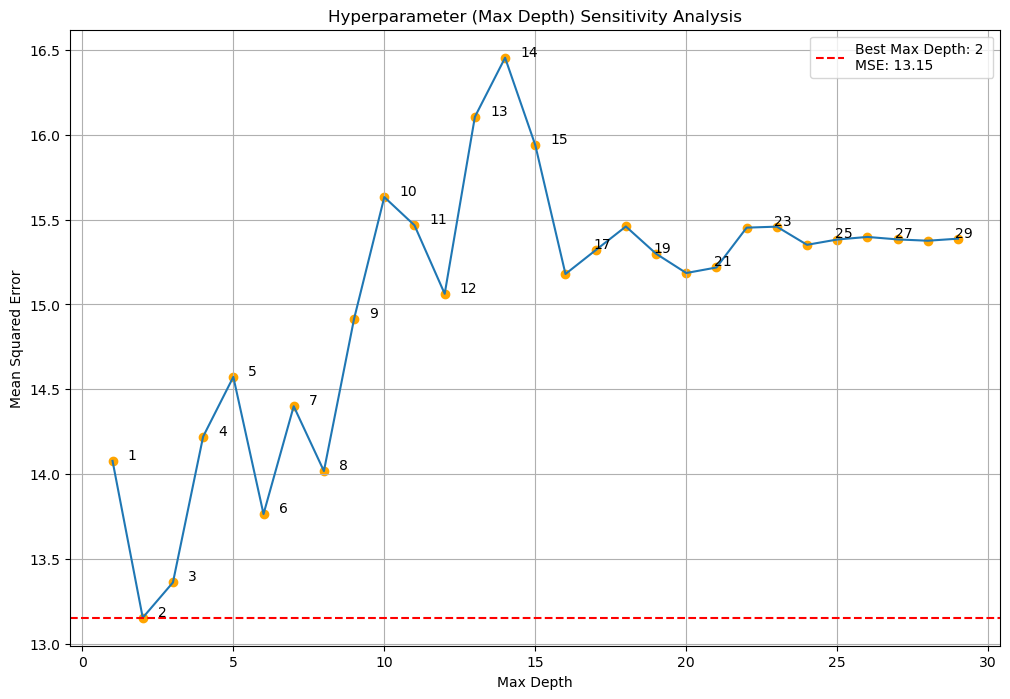

In [57]:
plt.figure(figsize=(12, 8))

# Plotting the Hyperparameter Sensitivity Analysis
sns.lineplot(data=hyper_param_analysis_df, x='max_depth', y='mse')

# Add Points to the Line Plot
plt.scatter(hyper_param_analysis_df['max_depth'], hyper_param_analysis_df['mse'], color='orange')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter (Max Depth) Sensitivity Analysis')
plt.grid(True)

# Add Horizontal Line For Best Max Depth
best_max_depth = hyper_param_analysis_df.loc[hyper_param_analysis_df['mse'].idxmin(), 'max_depth']
plt.axhline(y=hyper_param_analysis_df['mse'].min(), color='r', linestyle='--', label=f'Best Max Depth: {best_max_depth} \nMSE: {round(hyper_param_analysis_df["mse"].min(),2)}')

# Add Max Depth Labels and prevent overlapping
for i in range(len(hyper_param_analysis_df)):
    if i < 15: 
        plt.text(hyper_param_analysis_df['max_depth'].iloc[i] + 0.5, hyper_param_analysis_df['mse'].iloc[i] + 0.01, 
                str(hyper_param_analysis_df['max_depth'].iloc[i]), 
                horizontalalignment='left', size='medium', color='black')
    elif i % 2 == 0:
        plt.text(hyper_param_analysis_df['max_depth'].iloc[i] + 0.5, hyper_param_analysis_df['mse'].iloc[i] + 0.01, 
                str(hyper_param_analysis_df['max_depth'].iloc[i]), 
                horizontalalignment='right', size='medium', color='black')


plt.legend(loc='upper right')
plt.show()

Overall, the graph supports our earlier conclusion regarding the optimal "Max Depth" for our model with the optimal being a Max Depth of Two. However one thing that this graph does a really good job highlighting is the the fact that past a Max Depth of 3 we can see significant fluctuations in the MSE until the MSE is at its Peak when the Max Depth is 14. After that it slightly falls back down when is max depth of 16 and then plateaus around are MSE of 15.3    

### Final Model

In [50]:

# Create a lagged variable for GDP Growth
data_no_dummies = data_no_dummies_raw.copy()

# Create a lagged variable for GDP Growth
gdp_growth_lag = data_no_dummies.groupby('economy')['NY.GDP.MKTP.KD.ZG'].shift(-1)

# Add the lagged variable to the data
data_no_dummies['gdp_growth_lag'] = gdp_growth_lag
data_no_dummies.dropna(subset=['gdp_growth_lag', 'NY.GDP.MKTP.KD.ZG'],inplace=True) # Dropping Last Observation for each Economy

data_lag = pd.get_dummies(data_no_dummies) # Creating Dummy Variables

# Slip Data into Training and Testing Sets
train = data_lag.loc[data_lag.index <= '2013']
test = data_lag.loc[data_lag.index > '2013']

X_train = train.drop(columns=['gdp_growth_lag'])
y_train = train['gdp_growth_lag']

X_test = test.drop(columns=['gdp_growth_lag'])
y_test = test['gdp_growth_lag']


# Create a TimeSeriesSplit object for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter Tuning
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define the hyperparameter grid
param_space = {
    'n_estimators': Integer(100, 5000),
    'max_depth': Integer(3, 15),
    'learning_rate': Real(1e-4, 1e-1, prior='log-uniform'),
    'subsample': Real(0.1, 1),
    'colsample_bytree': Real(0.2, 1),
    'gamma': Real(0, 7),
    'min_child_weight': Integer(1, 10),
    'reg_alpha': Real(1e-8, 10.0, prior='log-uniform'),  # L1 regularization
    'reg_lambda': Real(1e-8, 10.0, prior='log-uniform') # L2 regularization
}

# Initialize the XGBoost model
model_proj = xgb.XGBRegressor(random_state=rs)

# Training the Model with Time Series Cross Validation
bayes_search = BayesSearchCV(estimator=model_proj, search_spaces=param_space, cv=tscv, scoring='neg_mean_squared_error')
bayes_search.fit(X_train, y_train)

# Retrieve the best model and best hyperparameters
best_model_proj = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Make predictions on the test set
predictions = best_model_proj.predict(X_test)

# Evaluate the model (example: using mean squared error)
mse = mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print("Printing Metrics for XGBoost Model Forcasting GDP Growth")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")

Printing Metrics for XGBoost Model Forcasting GDP Growth
Mean Squared Error: 13.706612275085302
Mean Absolute Percentage Error: 0.9731383925373656


## Breaking Down Models The Results

### Mean Absolute Error (MAPE) & Root Mean Squared Error (RMSE) By Country

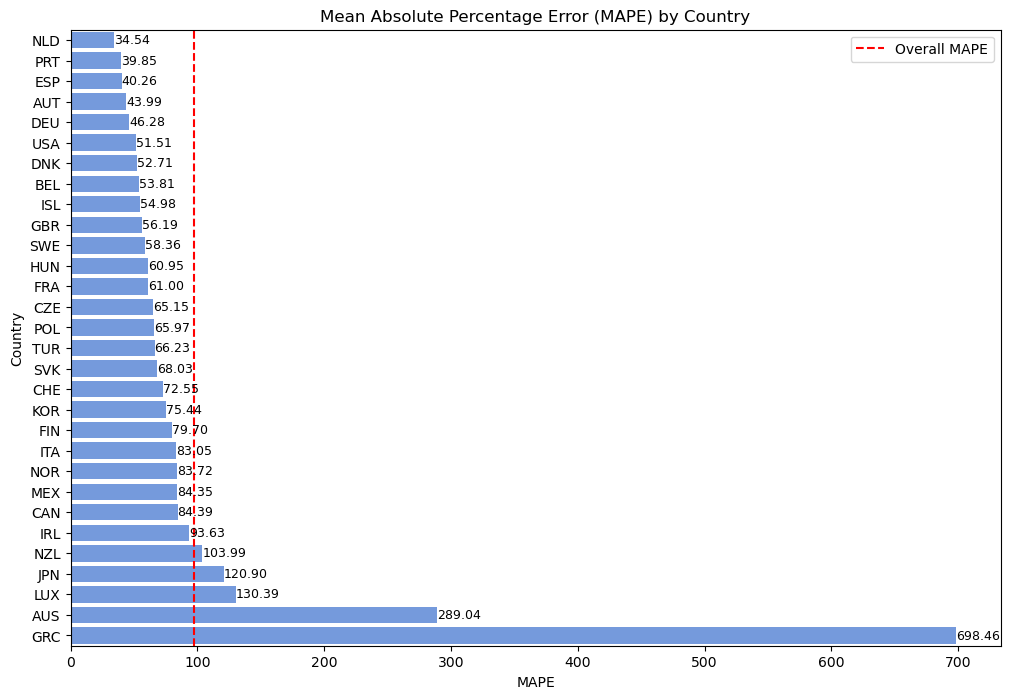

In [58]:
test.loc[:, 'gdp_growth_pred'] = predictions

mape_by_country = {}
for country in countries:
    country_data = test[test[f'economy_{country}'] == True]
    mape_by_country[country] = mean_absolute_percentage_error(country_data['gdp_growth_lag'], country_data['gdp_growth_pred'])*100  # Convert to percentage

# Convert the dictionary to a DataFrame
mape_by_country_df = pd.DataFrame(list(mape_by_country.items()), columns=['Country', 'MAPE'])
mape_by_country_df = mape_by_country_df.sort_values(by='MAPE', ascending=True)

# Plotting MAPE by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='MAPE', y='Country', data=mape_by_country_df, color='cornflowerblue', legend=False)
plt.title('Mean Absolute Percentage Error (MAPE) by Country')
plt.xlabel('MAPE')
plt.ylabel('Country')
plt.axvline(x=mape*100, color='red', linestyle='--', label='Overall MAPE')
plt.legend(loc='upper right')
for index, value in enumerate(mape_by_country_df['MAPE']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=9)

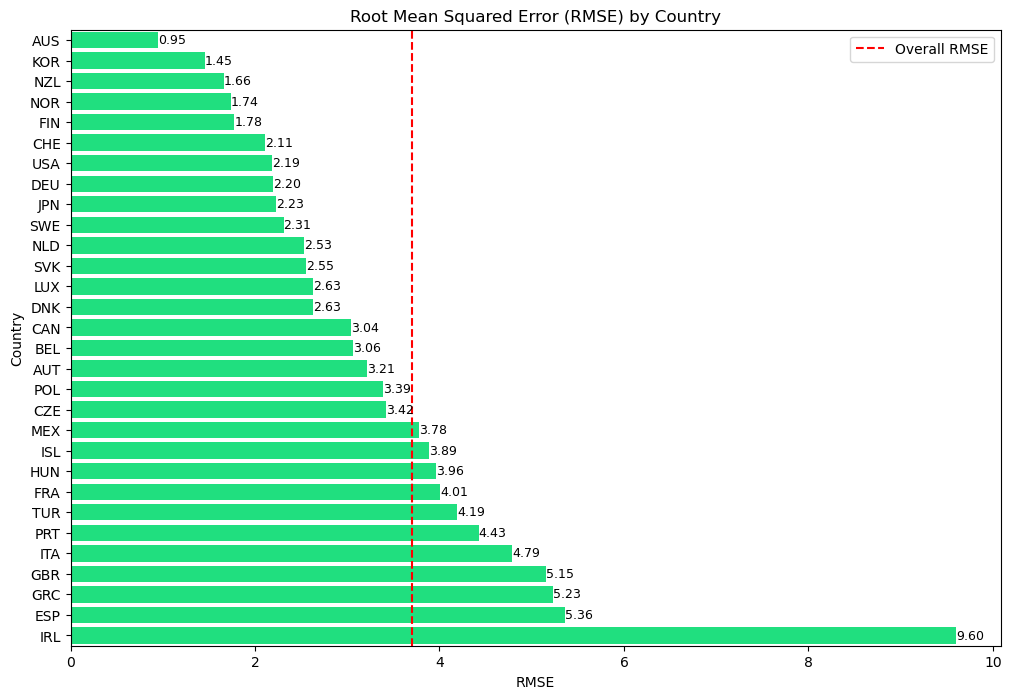

In [59]:
# Calculate RMSE by Country
rmse_by_country = {}
for country in countries:
    country_data = test[test[f'economy_{country}'] == True]
    rmse_by_country[country] = np.sqrt(mean_squared_error(country_data['gdp_growth_lag'], country_data['gdp_growth_pred']))

# Convert the dictionary to a DataFrame
rmse_by_country_df = pd.DataFrame(list(rmse_by_country.items()), columns=['Country', 'RMSE'])
rmse_by_country_df = rmse_by_country_df.sort_values(by='RMSE', ascending=True)

# Plotting RMSE by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='RMSE', y='Country', data=rmse_by_country_df, color='springgreen')
plt.title('Root Mean Squared Error (RMSE) by Country')
plt.xlabel('RMSE')
plt.ylabel('Country')
plt.axvline(x=np.sqrt(mse), color='red', linestyle='--', label='Overall RMSE')
plt.legend(loc='upper right')
for index, value in enumerate(rmse_by_country_df['RMSE']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=9)

### Comparing Prediction vs Actual GDP Growth Rate

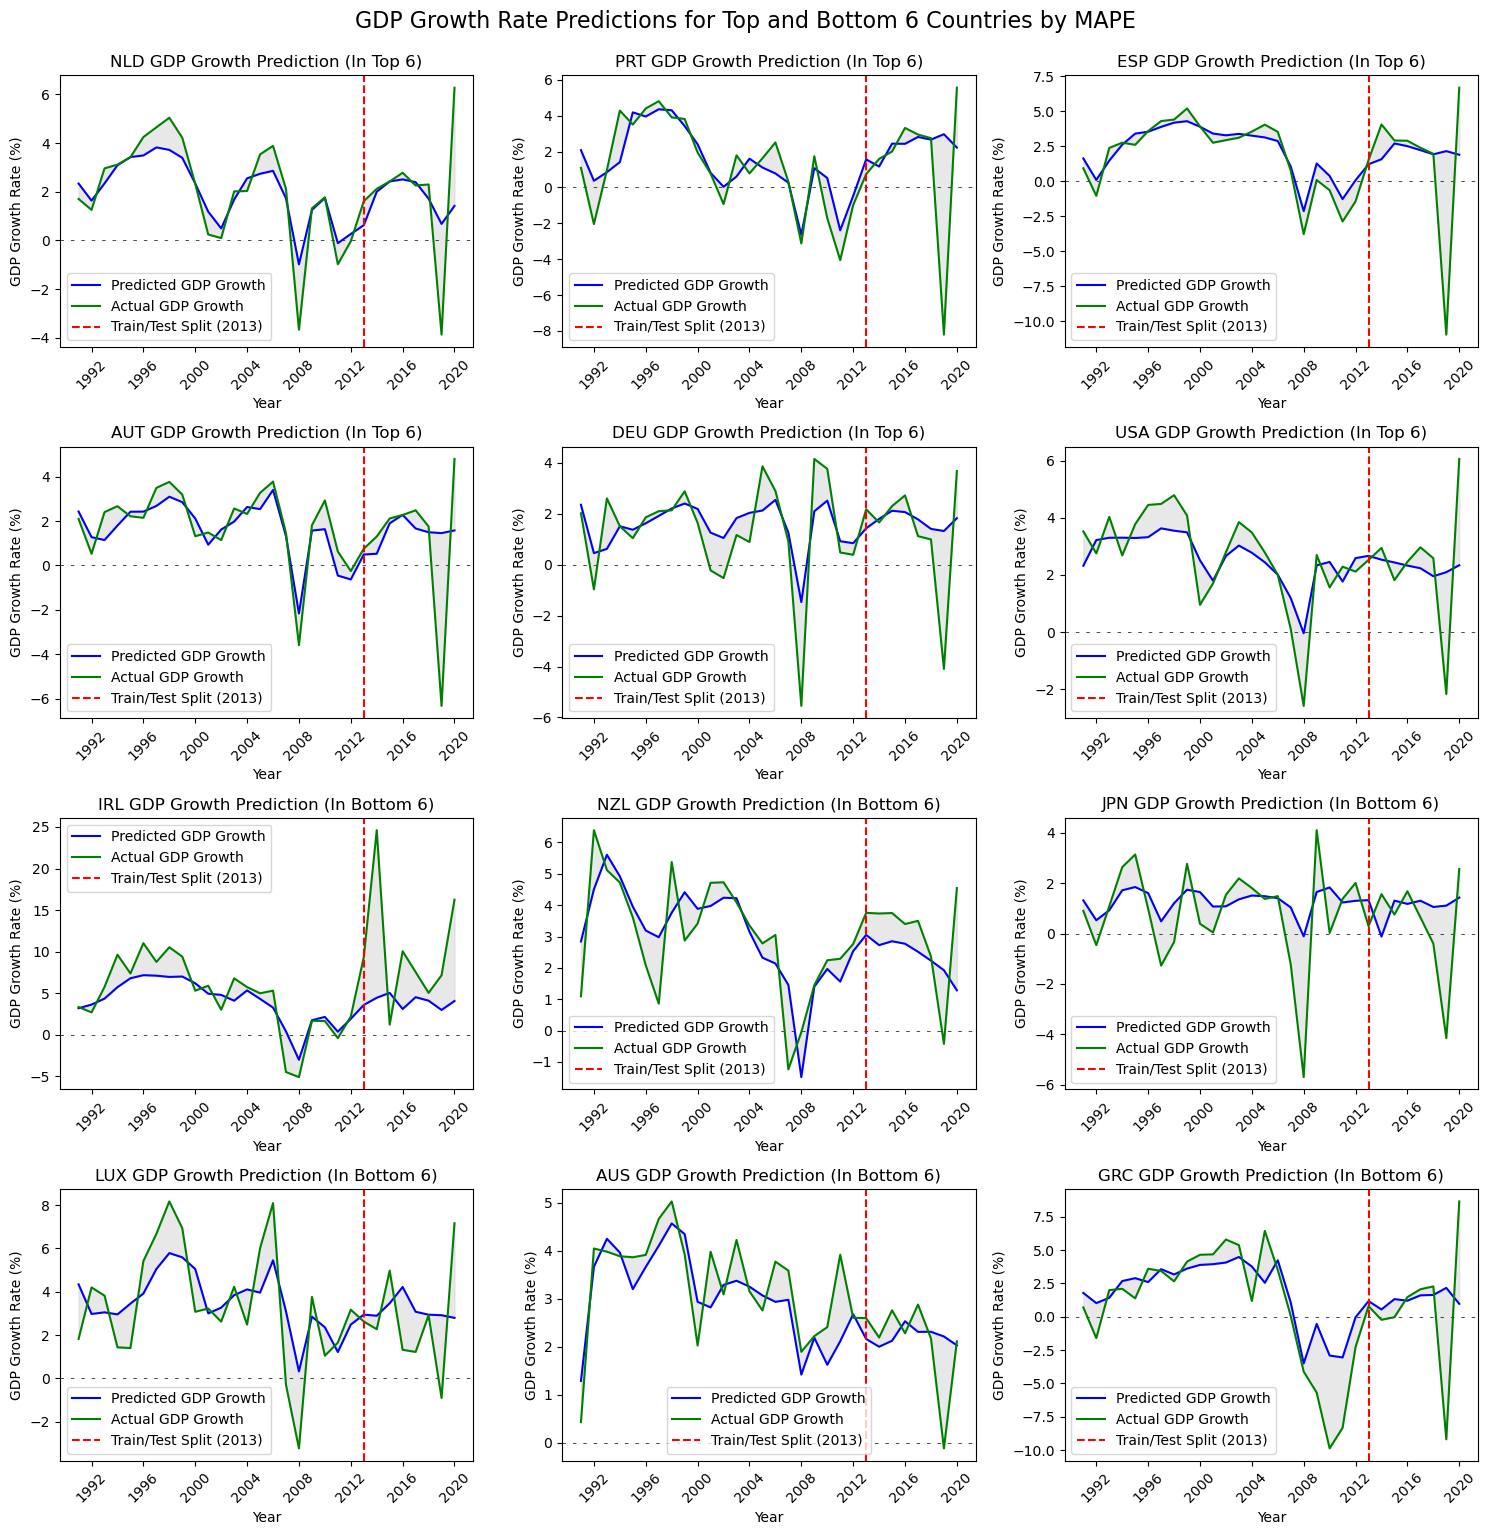

In [55]:
top_six_countries = mape_by_country_df.head(6)
bottom_six_countries = mape_by_country_df.tail(6)

# List of Top and Bottom Countries by MAPE
top_bottom_countries = pd.concat([top_six_countries, bottom_six_countries])['Country'].values.tolist()

# Generating Predcitions on the entire dataset for the top and bottom countries
predictions_all = best_model_proj.predict(data_lag.drop(columns=['gdp_growth_lag']))
full_data_preds = data_lag.copy()
full_data_preds['gdp_growth_pred'] = predictions_all

# Adding Country Names to the DataFrame
full_data_preds['Country'] = data_no_dummies['economy'].values

# Filter the DataFrame for the top and bottom countries
filtered_data = full_data_preds[full_data_preds['Country'].isin(top_bottom_countries)][['Country', 'gdp_growth_pred', 'gdp_growth_lag']]

# Creating Line Plot Grid for Top and Bottom Countries
plt.figure(figsize=(15, 15))
for i, country in enumerate(top_bottom_countries):
    plt.subplot(4, 3, i + 1)
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.axhline(y=0, color='black', linestyle=(0, (5, 10)), linewidth=0.5)
    plt.plot(country_data.index, country_data['gdp_growth_pred'], label='Predicted GDP Growth', color='blue')
    plt.plot(country_data.index, country_data['gdp_growth_lag'], label='Actual GDP Growth', color='green')
    plt.fill_between(country_data.index, country_data['gdp_growth_pred'], country_data['gdp_growth_lag'], color='lightgray', alpha=0.5)
    plt.axvline(x=dt.datetime(2013, 1, 1), color='red', linestyle='--', label='Train/Test Split (2013)')
    plt.title(f'{country} GDP Growth Prediction ({"In Top 6" if country in top_six_countries["Country"].values.tolist() else "In Bottom 6"})')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth Rate (%)')
    plt.legend()
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('GDP Growth Rate Predictions for Top and Bottom 6 Countries by MAPE', fontsize=16, y=1.02)
plt.show()


## Analysis of the Results
Our final model was trained to forecast the year-ahead GDP growth rate using 1 year lagged economic indicators i.e. using the previous year’s economic data to predict following years GDP growth rate. We employed Bayesian optimization with cross-validation for hyperparameter tuning. We used a  Time Series Split with 5 splits for cross validation and the data was trained using data from 1991 to 2013 and then testing against data from 2014 to 2022. This split was done because we wanted to ensure that train-test split boundary was not in middle of the 2008 Financial Crisis and Global Financial Crisis (GFC) but was after the recovery. 

**Answering The Research Question**

Moving back to our Original Research Question -How Accurately Can a Machine Learning Model be Used to Predict and Forecast GDP Growth Rates For OECD Nations?- Looking at the results from the Final XGBOOST Model, we can see that in the end our Model had a Mean Squared Error of 13.71 and Mean Absolute Percentage Error (MAPE) of 97.31% on the Test Set. While the overall score for out model isn’t great if we look at closer and by individual countries we can get a more nuanced picture. Looking at the MAPE by Country graph we can see that outside Greece and Australia, which are major outliers with a MAPE of around 700% and 300% respectively, for most countries our model has a MAPE well below the Overall MAPE. For some of our best performing countries it in even goes down only 35% e.g. the Netherlands. For most countries our MAPE hovers between 50% – 70%.  Moving on the RMSE (Root Mean Squared Error) we can again see a similar story outside of some of the major outliers notably in this case Ireland with MSE of 9.6, interestingly enough Australia despite having the highest MAPE has the lowest RMSE of only around 1. This again highlights the importance of consulting and looking at Multiple metrics when evaluating models e.g. in this case since even a 1% mean difference between the predicted and actual GDP growth rate resulted in an almost 300% MAPE because Australia had an extremely low growth rate.

Looking at the line graph comparing predicted vs. actual GDP growth for the top and bottom six countries, it paints a more flattering picture of our model and in this context, it is actually our model’s performance is relatively strong. Outside of the COVID-19 pandemic, the model generally does a good job of tracking actual growth rates. Even when it gets the magnitude wrong, it often correctly predicts the direction, suggesting that it is effectively identifying and responding to the underlying economic drivers.

While the model in most cases seem to miss individual spikes, it tends to capture the overall trend, smoothing out volatility. A great example is the Netherlands, where the predicted growth rate closely mirrors the actual growth rate but it’s a more smoothed out version. However, this smoothing effect also highlights a limitation—its struggle to capture sharp fluctuations, particularly in highly volatile economies like Ireland and Greece during major economic events or external shocks like COVID-19. Depending on how you look at it, this could be seen as both a strength and a weakness. While the model may not react to sudden economic shocks, it excels at capturing broader, more persistent trends in GDP growth. This makes it a useful tool for long-term forecasting and policy analysis where you don’t always want to be making predictions based on short term fluctuations.

Again, in Conclusion we can see that overall, our models performance is Mixed, it might seem to be poor at first glance, however it performs relatively well in the Context of GDP Growth Rate Forecasting which is extremely challenging. If we factor in the Fact that our model is able to Predict Growth for Multiple Different Countries and Evaluation includes the COVID 19 Pandemic, our models performance aligns well with the literature in this field.

**Risks and Advantages**

We can clearly see that based on the results on the test set there are significant risks in relying Soley on our model for unseen data. The test results show that the model does not respond well to external shocks and struggles to capture short-term fluctuations and volatility. As such if this was used as the only metric used by policy makers it could lead to poor short term economic policy and poor decision which could have significant negative social consequential for example preventing governments from taking pre-emptive actions if they anticipate economic shocks and volatility that may better be captured by other models or metrics. 

However, if used as one part of a diverse tool kit it can be useful for long-term forecasting and policy analysis where you don’t always want to be making predictions based on short term fluctuations since its able to capture broader, more persistent trends and is able to ignore some of these short-term fluctuations. 

The consequences of the model being wrong include inaccurate economic forecasts, poor policy decisions, and potential misallocation of resources. On the other hand, when it is correct, it allows for better long-term decision-making, reducing reactionary economic policies and contributing to financial stability. 

**Societal Impacts**

But at the same time in terms of the societal impact of models like this, they can help democratize economic analysis by allowing ordinary people to run complex economic analysis and can help demystify and remove some of the smoke and mirrors and better allow citizens and even business including small to medium business make more informed choices and plan long term strategies but it allows is another tool to hold governments accountable. Again we get some of same consequences when it may be wrong such potential misallocation of resources and poor decisions.



## Challenges
Overall, in terms of challenges out biggest challenge was improving the performance of the model and getting accurate predictions and this was basically due Nature of the question we are trying to answer. Forecasting long run data especially economic data can be extremely challenging due primarily to the fact to observed volatiles, the longer you collect such data more likely we are to observe one-time anomalies or rare events. For example, COVID-19 was a major challenge for our model because of how sudden and unprecedent it was, e.g. if we exclude it and did it only until 2019 the MAPE decreases by almost 20%. At the same GDP and GDP growth rate is extremely complex and default to model, hundreds of different variables can influence it. The economy is complex, dynamic, and interconnected. Shocks like Wars, trade disputes, energy crises, or extreme weather events can have immediate and long-term economic impacts that are difficult to model and are nearly impossible to predict. There are also limitations in the data, many economic indicators have significant lags and don’t always respond immediately and sometime the effects of things like Inflation and High Government Debt might not be felt until like 5 years outs. These challenges are really difficult or sometimes impossible to overcome simply due to the nature of Economics and economic growth, we tried mitigating some of this by being more through and using a wide and diverse range of indicators/features in our model. 

Aside from that we also faced a few other challenges including the fact that Hyperparameter tuning for the XGBoost model required significant computational resources and time, especially with this dataset. This caused by the fact XGBoost has numerous hyperparameters that influence model performance, and due to the complexity of task doing an extensive search and finding the optimal set often involves running multiple training iterations. We tried to minimize this by using a Gaussian Optimizer instead of Grid Search to make the process more efficient. The initial format of the data was unconventional, requiring complex reshaping to make it usable for analysis. Cause: Data may have been structured in a wide format with multiple indicators spread across columns, complicating direct analysis. Solution: Writing specific pandas code, like data = data.stack().unstack(level=1).reset_index().rename(columns={'level_1': 'Year'}), was necessary to transform the data into a more analyzable format. 


## Potential Future Questions:
Overall,  one potential future question we would like to explore is How can we incorporate uncertainty and model volatility to predict the variance of the Data in addition to the Mean estimate? We would want to explore how we could potentially use something like a GARCH model or another potential idea would be to somehow incorporate Bootstrapped Standard Errors so that can get some Confidence Intervals around our predictions and instead of for example saying that next year’s GDP growth with be 4.5% instead we could say that the estimates it would be on average around 4.5% but could potentially be between 3% to 5% based on a 95% Confidence Interval. Such model we be even more useful to help with decision making allowing policy makers be better informed and consider both best and worst circumstances and help improve the accuracy and performance for our model.


## Model Card

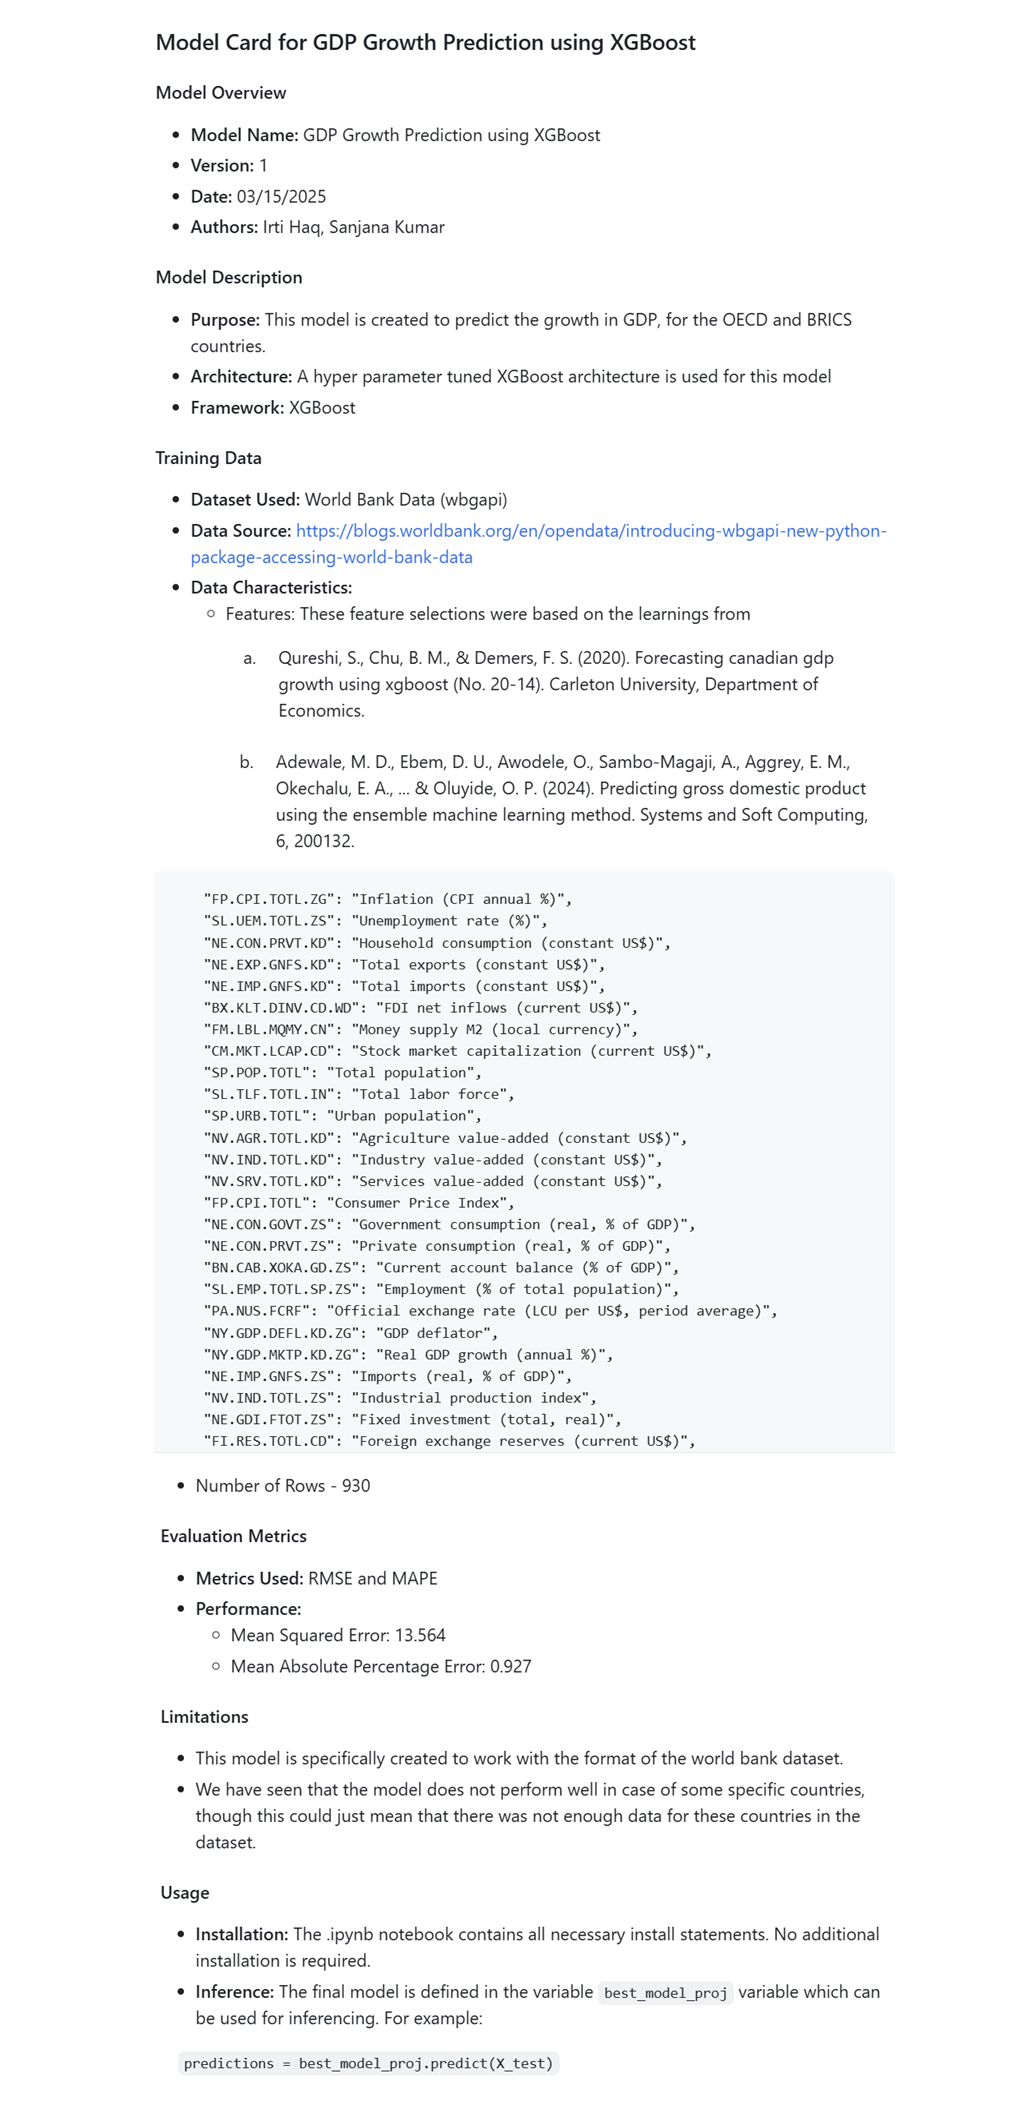

### Model Card for GDP Growth Prediction using XGBoost (TEXT)
### Model Overview
- **Model Name:** GDP Growth Prediction using XGBoost
- **Version:** 1
- **Date:** 03/15/2025
- **Authors:** Irti Haq, Sanjana Kumar

### Model Description
- **Purpose:** This model is created to predict the growth in GDP, for the OECD and BRICS countries.
- **Architecture:** A hyper parameter tuned XGBoost architecture is used for this model
- **Framework:** XGBoost

### Training Data
- **Dataset Used:** World Bank Data (wbgapi)
- **Data Source:** https://blogs.worldbank.org/en/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data
- **Data Characteristics:**
  - Features: These feature selections were based on the learnings from    
    1. Qureshi, S., Chu, B. M., & Demers, F. S. (2020). Forecasting canadian gdp growth using xgboost (No. 20-14). Carleton University, Department of Economics.

    2. Adewale, M. D., Ebem, D. U., Awodele, O., Sambo-Magaji, A., Aggrey, E. M., Okechalu, E. A., ... & Oluyide, O. P. (2024). Predicting gross domestic product using the ensemble machine learning method. Systems and Soft Computing, 6, 200132.

```
    "FP.CPI.TOTL.ZG": "Inflation (CPI annual %)",
    "SL.UEM.TOTL.ZS": "Unemployment rate (%)",
    "NE.CON.PRVT.KD": "Household consumption (constant US$)",
    "NE.EXP.GNFS.KD": "Total exports (constant US$)",
    "NE.IMP.GNFS.KD": "Total imports (constant US$)",
    "BX.KLT.DINV.CD.WD": "FDI net inflows (current US$)",
    "FM.LBL.MQMY.CN": "Money supply M2 (local currency)",
    "CM.MKT.LCAP.CD": "Stock market capitalization (current US$)",
    "SP.POP.TOTL": "Total population",
    "SL.TLF.TOTL.IN": "Total labor force",
    "SP.URB.TOTL": "Urban population",
    "NV.AGR.TOTL.KD": "Agriculture value-added (constant US$)",
    "NV.IND.TOTL.KD": "Industry value-added (constant US$)",
    "NV.SRV.TOTL.KD": "Services value-added (constant US$)",
    "FP.CPI.TOTL": "Consumer Price Index",
    "NE.CON.GOVT.ZS": "Government consumption (real, % of GDP)",
    "NE.CON.PRVT.ZS": "Private consumption (real, % of GDP)",
    "BN.CAB.XOKA.GD.ZS": "Current account balance (% of GDP)",
    "SL.EMP.TOTL.SP.ZS": "Employment (% of total population)",
    "PA.NUS.FCRF": "Official exchange rate (LCU per US$, period average)",
    "NY.GDP.DEFL.KD.ZG": "GDP deflator",
    "NY.GDP.MKTP.KD.ZG": "Real GDP growth (annual %)",
    "NE.IMP.GNFS.ZS": "Imports (real, % of GDP)",
    "NV.IND.TOTL.ZS": "Industrial production index",
    "NE.GDI.FTOT.ZS": "Fixed investment (total, real)",
    "FI.RES.TOTL.CD": "Foreign exchange reserves (current US$)",
    'CM.MKT.LCAP.GD.ZS': 'Market capitalization of listed domestic companies (% of GDP)'
```
  - Number of Rows - 930


## Evaluation Metrics
- **Metrics Used:** RMSE and MAPE
- **Performance:**
  - Mean Squared Error: 13.564
  - Mean Absolute Percentage Error: 0.927

## Limitations
- This model is specifically created to work with the format of the world bank dataset.
- We have seen that the model does not perform well in case of some specific countries, though this could just mean that there was not enough data for these countries in the dataset.

## Usage
- **Installation:** The .ipynb notebook contains all necessary install statements. No additional installation is required.
- **Inference:** The final model is defined in the variable `best_model_proj` variable which can be used for inferencing. For example:

```predictions = best_model_proj.predict(X_test)```
